In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# sklearn: data preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

# sklearn: train model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, classification_report

# sklearn classifiers

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn import datasets, ensemble, model_selection
from sklearn.ensemble import RandomForestClassifier

from sklearn.neural_network import MLPClassifier

In [2]:
#Loading training and test data and concatanate


training_data = pd.read_csv('UNSW_NB15_training-set.csv')
testing_data = pd.read_csv('UNSW_NB15_testing-set.csv')

training_data

id       dur proto service state  spkts  dpkts  sbytes  dbytes  \
0            1  0.121478   tcp       -   FIN      6      4     258     172   
1            2  0.649902   tcp       -   FIN     14     38     734   42014   
2            3  1.623129   tcp       -   FIN      8     16     364   13186   
3            4  1.681642   tcp     ftp   FIN     12     12     628     770   
4            5  0.449454   tcp       -   FIN     10      6     534     268   
...        ...       ...   ...     ...   ...    ...    ...     ...     ...   
175336  175337  0.000009   udp     dns   INT      2      0     114       0   
175337  175338  0.505762   tcp       -   FIN     10      8     620     354   
175338  175339  0.000009   udp     dns   INT      2      0     114       0   
175339  175340  0.000009   udp     dns   INT      2      0     114       0   
175340  175341  0.000009   udp     dns   INT      2      0     114       0   

                 rate  ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  \
0           74.087490  ...                 1               1             0   
1           78.473372  ...                 1               2             0   
2           14.170161  ...                 1               3             0   
3           13.677108  ...                 1               3             1   
4           33.373826  ...                 1              40             0   
...               ...  ...               ...             ...           ...   
175336  111111.107200  ...                13              24             0   
175337      33.612649  ...                 1               2             0   
175338  111111.107200  ...                 3              13             0   
175339  111111.107200  ...                14              30             0   
175340  111111.107200  ...                16              30             0   

        ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  \
0                0                 0           1           1                0   
1                0                 0           1           6                0   
2                0                 0           2           6                0   
3                1                 0           2           1                0   
4                0                 0           2          39                0   
...            ...               ...         ...         ...              ...   
175336           0                 0          24          24                0   
175337           0                 0           1           1                0   
175338           0                 0           3          12                0   
175339           0                 0          30          30                0   
175340           0                 0          30          30                0   

        attack_cat  label  
0           Normal      0  
1           Normal      0  
2           Normal      0  
3           Normal      0  
4           Normal      0  
...            ...    ...  
175336     Generic      1  
175337   Shellcode      1  
175338     Generic      1  
175339     Generic      1  
175340     Generic      1  

[175341 rows x 45 columns]

In [3]:
testing_data

id       dur proto service state  spkts  dpkts  sbytes  dbytes  \
0          1  0.000011   udp       -   INT      2      0     496       0   
1          2  0.000008   udp       -   INT      2      0    1762       0   
2          3  0.000005   udp       -   INT      2      0    1068       0   
3          4  0.000006   udp       -   INT      2      0     900       0   
4          5  0.000010   udp       -   INT      2      0    2126       0   
...      ...       ...   ...     ...   ...    ...    ...     ...     ...   
82327  82328  0.000005   udp       -   INT      2      0     104       0   
82328  82329  1.106101   tcp       -   FIN     20      8   18062     354   
82329  82330  0.000000   arp       -   INT      1      0      46       0   
82330  82331  0.000000   arp       -   INT      1      0      46       0   
82331  82332  0.000009   udp       -   INT      2      0     104       0   

                rate  ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  \
0       90909.090200  ...                 1               2             0   
1      125000.000300  ...                 1               2             0   
2      200000.005100  ...                 1               3             0   
3      166666.660800  ...                 1               3             0   
4      100000.002500  ...                 1               3             0   
...              ...  ...               ...             ...           ...   
82327  200000.005100  ...                 1               2             0   
82328      24.410067  ...                 1               1             0   
82329       0.000000  ...                 1               1             0   
82330       0.000000  ...                 1               1             0   
82331  111111.107200  ...                 1               1             0   

       ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  \
0               0                 0           1           2                0   
1               0                 0           1           2                0   
2               0                 0           1           3                0   
3               0                 0           2           3                0   
4               0                 0           2           3                0   
...           ...               ...         ...         ...              ...   
82327           0                 0           2           1                0   
82328           0                 0           3           2                0   
82329           0                 0           1           1                1   
82330           0                 0           1           1                1   
82331           0                 0           1           1                0   

       attack_cat  label  
0          Normal      0  
1          Normal      0  
2          Normal      0  
3          Normal      0  
4          Normal      0  
...           ...    ...  
82327      Normal      0  
82328      Normal      0  
82329      Normal      0  
82330      Normal      0  
82331      Normal      0  

[82332 rows x 45 columns]

In [4]:
concatenated_data = pd.concat([training_data, testing_data])
concatenated_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257673 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 257673 non-null  int64  
 1   dur                257673 non-null  float64
 2   proto              257673 non-null  object 
 3   service            257673 non-null  object 
 4   state              257673 non-null  object 
 5   spkts              257673 non-null  int64  
 6   dpkts              257673 non-null  int64  
 7   sbytes             257673 non-null  int64  
 8   dbytes             257673 non-null  int64  
 9   rate               257673 non-null  float64
 10  sttl               257673 non-null  int64  
 11  dttl               257673 non-null  int64  
 12  sload              257673 non-null  float64
 13  dload              257673 non-null  float64
 14  sloss              257673 non-null  int64  
 15  dloss              257673 non-null  int64  
 16  sin

In [5]:
unique_categories = concatenated_data['attack_cat'].unique()

unique_categories

array(['Normal', 'Backdoor', 'Analysis', 'Fuzzers', 'Shellcode',
       'Reconnaissance', 'Exploits', 'DoS', 'Worms', 'Generic'],
      dtype=object)

In [6]:
unique_labels = concatenated_data['label'].unique()

unique_labels

array([0, 1], dtype=int64)

In [7]:
concatenated_data.isnull().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [8]:
useful_data = concatenated_data.dropna()

In [9]:
useful_data.shape

(257673, 45)

<AxesSubplot:>

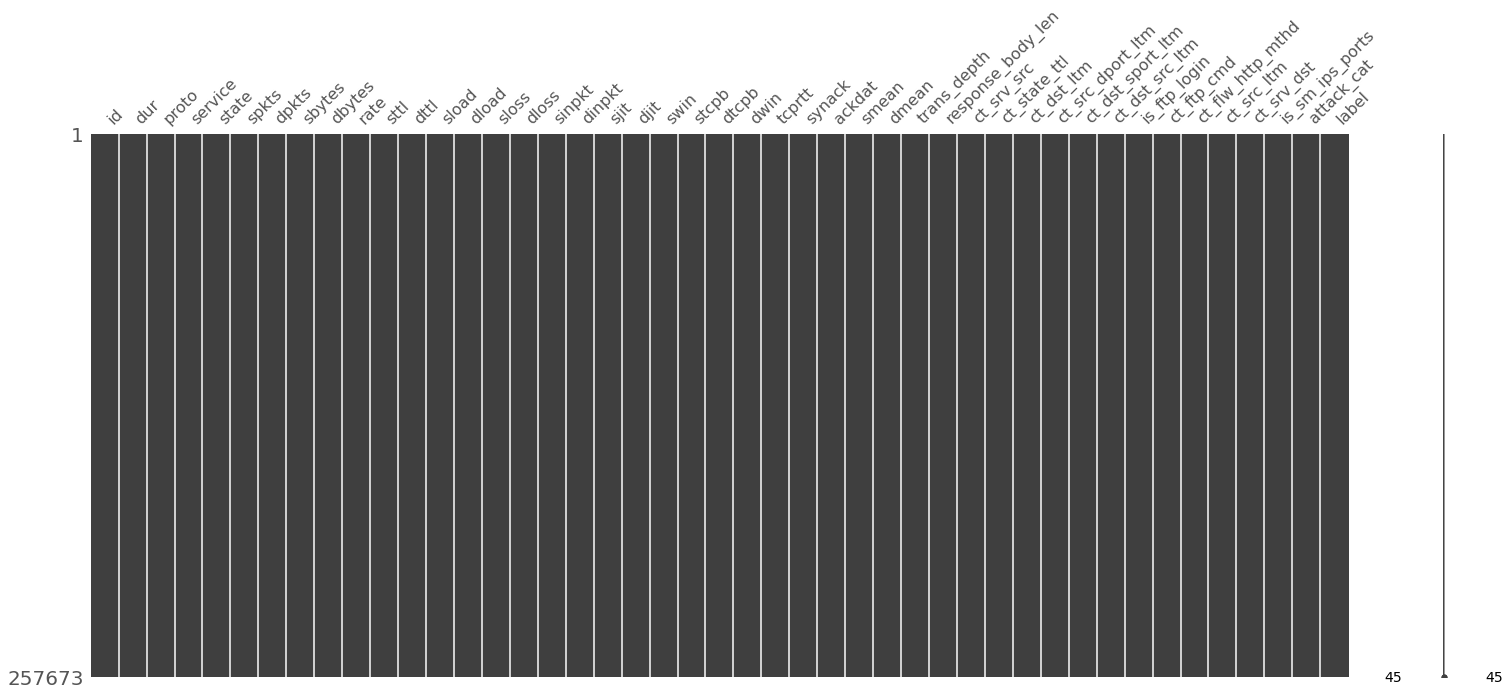

In [10]:
import missingno
import pickle

missingno.matrix(useful_data)

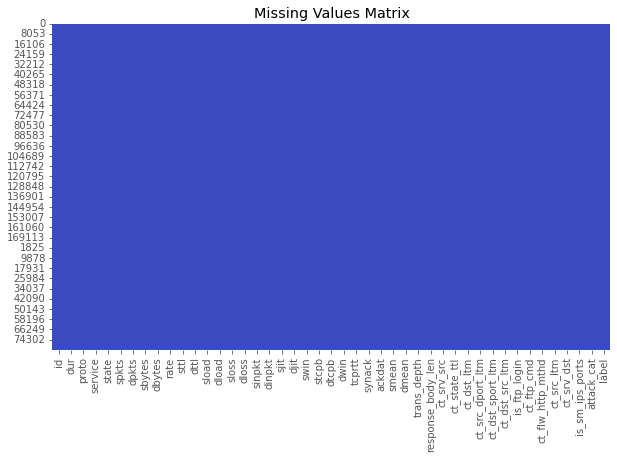

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(useful_data.isnull(), cbar=False, cmap='coolwarm')
plt.title('Missing Values Matrix')
plt.show()

In [12]:
useful_data.describe(include="all")

id            dur   proto service   state          spkts  \
count   257673.000000  257673.000000  257673  257673  257673  257673.000000   
unique            NaN            NaN     133      13      11            NaN   
top               NaN            NaN     tcp       -     FIN            NaN   
freq              NaN            NaN  123041  141321  117164            NaN   
mean     72811.823858       1.246715     NaN     NaN     NaN      19.777144   
std      48929.917641       5.974305     NaN     NaN     NaN     135.947152   
min          1.000000       0.000000     NaN     NaN     NaN       1.000000   
25%      32210.000000       0.000008     NaN     NaN     NaN       2.000000   
50%      64419.000000       0.004285     NaN     NaN     NaN       4.000000   
75%     110923.000000       0.685777     NaN     NaN     NaN      12.000000   
max     175341.000000      59.999989     NaN     NaN     NaN   10646.000000   

                dpkts        sbytes        dbytes          rate  ...  \
count   257673.000000  2.576730e+05  2.576730e+05  2.576730e+05  ...   
unique            NaN           NaN           NaN           NaN  ...   
top               NaN           NaN           NaN           NaN  ...   
freq              NaN           NaN           NaN           NaN  ...   
mean        18.514703  8.572952e+03  1.438729e+04  9.125391e+04  ...   
std        111.985965  1.737739e+05  1.461993e+05  1.603446e+05  ...   
min          0.000000  2.400000e+01  0.000000e+00  0.000000e+00  ...   
25%          0.000000  1.140000e+02  0.000000e+00  3.078928e+01  ...   
50%          2.000000  5.280000e+02  1.780000e+02  2.955665e+03  ...   
75%         10.000000  1.362000e+03  1.064000e+03  1.250000e+05  ...   
max      11018.000000  1.435577e+07  1.465753e+07  1.000000e+06  ...   

        ct_dst_sport_ltm  ct_dst_src_ltm   is_ftp_login     ct_ftp_cmd  \
count      257673.000000   257673.000000  257673.000000  257673.000000   
unique               NaN             NaN            NaN            NaN   
top                  NaN             NaN            NaN            NaN   
freq                 NaN             NaN            NaN            NaN   
mean            4.032677        8.322964       0.012819       0.012850   
std             5.831515       11.120754       0.116091       0.116421   
min             1.000000        1.000000       0.000000       0.000000   
25%             1.000000        1.000000       0.000000       0.000000   
50%             1.000000        3.000000       0.000000       0.000000   
75%             3.000000        8.000000       0.000000       0.000000   
max            46.000000       65.000000       4.000000       4.000000   

        ct_flw_http_mthd     ct_src_ltm     ct_srv_dst  is_sm_ips_ports  \
count      257673.000000  257673.000000  257673.000000    257673.000000   
unique               NaN            NaN            NaN              NaN   
top                  NaN            NaN            NaN              NaN   
freq                 NaN            NaN            NaN              NaN   
mean            0.132005       6.800045       9.121049         0.014274   
std             0.681854       8.396266      10.874752         0.118618   
min             0.000000       1.000000       1.000000         0.000000   
25%             0.000000       2.000000       2.000000         0.000000   
50%             0.000000       3.000000       4.000000         0.000000   
75%             0.000000       8.000000      11.000000         0.000000   
max            30.000000      60.000000      62.000000         1.000000   

        attack_cat          label  
count       257673  257673.000000  
unique          10            NaN  
top         Normal            NaN  
freq         93000            NaN  
mean           NaN       0.639077  
std            NaN       0.480269  
min            NaN       0.000000  
25%            NaN       0.000000  
50%            NaN       1.000000  
75%            NaN       1.000000  
max            NaN 

<AxesSubplot:>

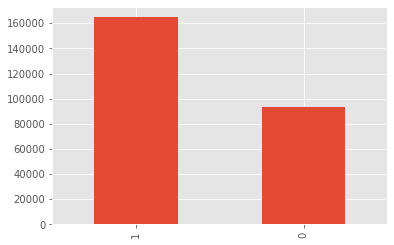

In [13]:
useful_data['label'].value_counts().plot.bar()

<AxesSubplot:>

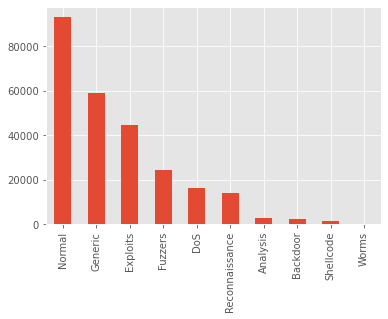

In [14]:
useful_data['attack_cat'].value_counts().plot.bar()

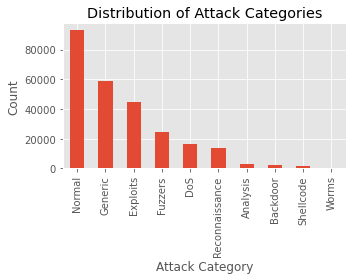

In [15]:
plt.figure(figsize=(5, 4))
useful_data['attack_cat'].value_counts().plot.bar()
plt.xlabel('Attack Category')
plt.ylabel('Count')
plt.title('Distribution of Attack Categories')
plt.tight_layout()
plt.show()

In [16]:
useful_data['label'].value_counts(normalize=True)

1    0.639077
0    0.360923
Name: label, dtype: float64

## Dataset Balance Ratio

In [17]:
labels = useful_data['label']
attacks = useful_data['attack_cat']

Distributions of labels: 0.6:1 (93000/164673)


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


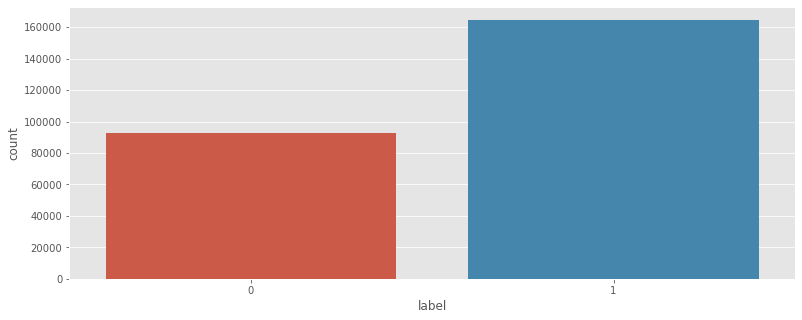

In [18]:
def AttackLabel_ratio(input):
    
    #Calculate ratio
    
    unique, count = np.unique(input, return_counts=True)
    ratio = round(count[0]/count[1], 1)
    return f'{ratio}:1 ({count[0]}/{count[1]})'

print('Distributions of labels:', AttackLabel_ratio(labels))
plt.figure(figsize=(13,5))
sns.countplot(labels,label="Sum")
plt.show()

Distribution of attack types: 1.1:1 (2677/2329)


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


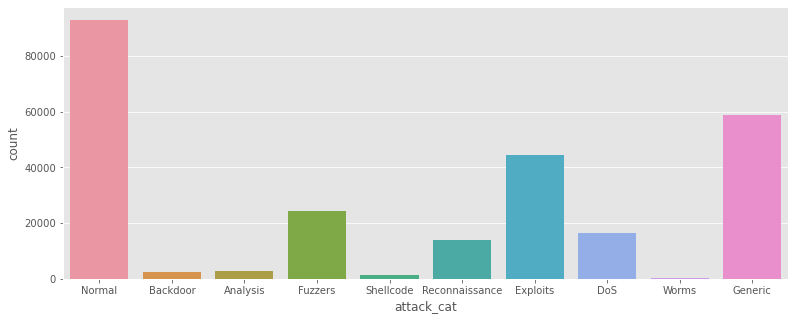

In [19]:
print('Distribution of attack types:', AttackLabel_ratio(attacks))
plt.figure(figsize=(13,5))
sns.countplot(attacks,label="Sum")
plt.show()

### Encoding categorical features Encoding categorical features using LabelEncoder.

In [20]:
# Select categorical columns
categorical_columns = useful_data.select_dtypes(include=['object']).columns
# Encode categorical features with LabelEncoder
encoding = LabelEncoder()
useful_data[categorical_columns] = useful_data[categorical_columns].apply(encoding.fit_transform)

In [21]:
useful_data.head()

id       dur  proto  service  state  spkts  dpkts  sbytes  dbytes  \
0   1  0.121478    113        0      4      6      4     258     172   
1   2  0.649902    113        0      4     14     38     734   42014   
2   3  1.623129    113        0      4      8     16     364   13186   
3   4  1.681642    113        3      4     12     12     628     770   
4   5  0.449454    113        0      4     10      6     534     268   

        rate  ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  ct_ftp_cmd  \
0  74.087490  ...                 1               1             0           0   
1  78.473372  ...                 1               2             0           0   
2  14.170161  ...                 1               3             0           0   
3  13.677108  ...                 1               3             1           1   
4  33.373826  ...                 1              40             0           0   

   ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  attack_cat  \
0                 0           1           1                0           6   
1                 0           1           6                0           6   
2                 0           2           6                0           6   
3                 0           2           1                0           6   
4                 0           2          39                0           6   

   label  
0      0  
1      0  
2      0  
3      0  
4      0  

[5 rows x 45 columns]

# Data Correlation

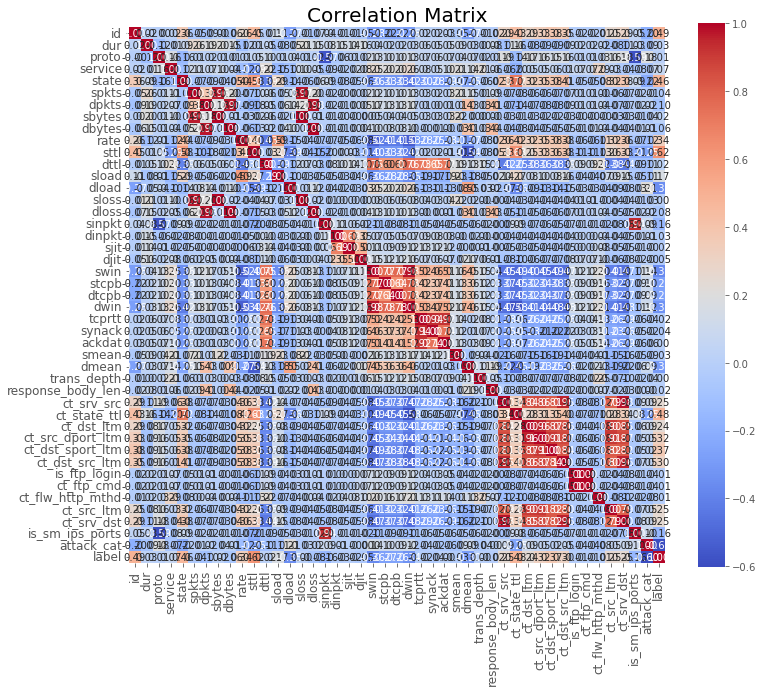

In [22]:
fig = plt.figure(figsize=(12, 10))
sns.heatmap(useful_data.corr(), cmap='coolwarm', annot=True, fmt='.2f', square=True)
plt.title('Correlation Matrix', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

fig.savefig('Features with Corelation.png')

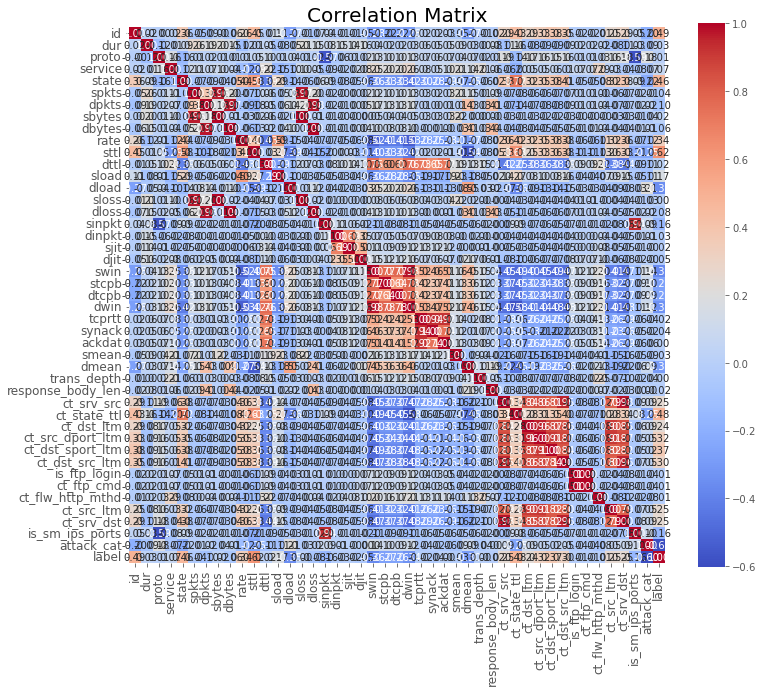

In [23]:
plt.figure(figsize=(12, 10))
sns.heatmap(useful_data.corr(), cmap='coolwarm', annot=True, fmt='.2f', square=True)
plt.title('Correlation Matrix', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

fig = plt.gcf()
fig.savefig('Features with Corelation.png', dpi=300)

In [24]:
corr_matrix = useful_data.corr().abs()
correlated_vars = corr_matrix[corr_matrix > 0.98].stack().reset_index()
correlated_vars = correlated_vars[correlated_vars['level_0'] < correlated_vars['level_1']]
correlated_vars.columns = ['Var1', 'Var2', 'Corr']
correlated_vars = correlated_vars.sort_values(by='Corr', ascending=False)
print(correlated_vars)

          Var1          Var2      Corr
45  ct_ftp_cmd  is_ftp_login  0.998855
10      dbytes         dloss  0.996711
8       sbytes         sloss  0.995772
28        dwin          swin  0.980458


In [25]:
corr_matrix = useful_data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.98)]
useful_data = useful_data.drop(columns=to_drop)

In [26]:
useful_data

id       dur  proto  service  state  spkts  dpkts  sbytes  dbytes  \
0          1  0.121478    113        0      4      6      4     258     172   
1          2  0.649902    113        0      4     14     38     734   42014   
2          3  1.623129    113        0      4      8     16     364   13186   
3          4  1.681642    113        3      4     12     12     628     770   
4          5  0.449454    113        0      4     10      6     534     268   
...      ...       ...    ...      ...    ...    ...    ...     ...     ...   
82327  82328  0.000005    119        0      5      2      0     104       0   
82328  82329  1.106101    113        0      4     20      8   18062     354   
82329  82330  0.000000      6        0      5      1      0      46       0   
82330  82331  0.000000      6        0      5      1      0      46       0   
82331  82332  0.000009    119        0      5      2      0     104       0   

                rate  ...  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  \
0          74.087490  ...                 1                 1               1   
1          78.473372  ...                 1                 1               2   
2          14.170161  ...                 1                 1               3   
3          13.677108  ...                 1                 1               3   
4          33.373826  ...                 2                 1              40   
...              ...  ...               ...               ...             ...   
82327  200000.005100  ...                 1                 1               2   
82328      24.410067  ...                 1                 1               1   
82329       0.000000  ...                 1                 1               1   
82330       0.000000  ...                 1                 1               1   
82331  111111.107200  ...                 1                 1               1   

       is_ftp_login  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  \
0                 0                 0           1           1   
1                 0                 0           1           6   
2                 0                 0           2           6   
3                 1                 0           2           1   
4                 0                 0           2          39   
...             ...               ...         ...         ...   
82327             0                 0           2           1   
82328             0                 0           3           2   
82329             0                 0           1           1   
82330             0                 0           1           1   
82331             0                 0           1           1   

       is_sm_ips_ports  attack_cat  label  
0                    0           6      0  
1                    0           6      0  
2                    0           6      0  
3                    0           6      0  
4                    0           6      0  
...                ...         ...    ...  
82327                0           6      0  
82328                0           6      0  
82329                1           6      0  
82330                1           6      0  
82331                0           6      0  

[257673 rows x 41 columns]

In [27]:
useful_data = useful_data.drop(axis=1, columns=['id','attack_cat'])

In [28]:
useful_data

dur  proto  service  state  spkts  dpkts  sbytes  dbytes  \
0      0.121478    113        0      4      6      4     258     172   
1      0.649902    113        0      4     14     38     734   42014   
2      1.623129    113        0      4      8     16     364   13186   
3      1.681642    113        3      4     12     12     628     770   
4      0.449454    113        0      4     10      6     534     268   
...         ...    ...      ...    ...    ...    ...     ...     ...   
82327  0.000005    119        0      5      2      0     104       0   
82328  1.106101    113        0      4     20      8   18062     354   
82329  0.000000      6        0      5      1      0      46       0   
82330  0.000000      6        0      5      1      0      46       0   
82331  0.000009    119        0      5      2      0     104       0   

                rate  sttl  ...  ct_dst_ltm  ct_src_dport_ltm  \
0          74.087490   252  ...           1                 1   
1          78.473372    62  ...           1                 1   
2          14.170161    62  ...           2                 1   
3          13.677108    62  ...           2                 1   
4          33.373826   254  ...           2                 2   
...              ...   ...  ...         ...               ...   
82327  200000.005100   254  ...           2                 1   
82328      24.410067   254  ...           2                 1   
82329       0.000000     0  ...           1                 1   
82330       0.000000     0  ...           1                 1   
82331  111111.107200   254  ...           1                 1   

       ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  ct_flw_http_mthd  \
0                     1               1             0                 0   
1                     1               2             0                 0   
2                     1               3             0                 0   
3                     1               3             1                 0   
4                     1              40             0                 0   
...                 ...             ...           ...               ...   
82327                 1               2             0                 0   
82328                 1               1             0                 0   
82329                 1               1             0                 0   
82330                 1               1             0                 0   
82331                 1               1             0                 0   

       ct_src_ltm  ct_srv_dst  is_sm_ips_ports  label  
0               1           1                0      0  
1               1           6                0      0  
2               2           6                0      0  
3               2           1                0      0  
4               2          39                0      0  
...           ...         ...              ...    ...  
82327           2           1                0      0  
82328           3           2                0      0  
82329           1           1                1      0  
82330           1           1                1      0  
82331           1           1                0      0  

[257673 rows x 39 columns]

In [29]:
X = useful_data.drop(columns=['label'])
feature_list = list(X.columns)

In [30]:
print(len(feature_list))
feature_list

38


['dur',
 'proto',
 'service',
 'state',
 'spkts',
 'dpkts',
 'sbytes',
 'dbytes',
 'rate',
 'sttl',
 'dttl',
 'sload',
 'dload',
 'sinpkt',
 'dinpkt',
 'sjit',
 'djit',
 'swin',
 'stcpb',
 'dtcpb',
 'tcprtt',
 'synack',
 'ackdat',
 'smean',
 'dmean',
 'trans_depth',
 'response_body_len',
 'ct_srv_src',
 'ct_state_ttl',
 'ct_dst_ltm',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'is_ftp_login',
 'ct_flw_http_mthd',
 'ct_src_ltm',
 'ct_srv_dst',
 'is_sm_ips_ports']

In [31]:
y = useful_data['label']

# Train/Test Splitting

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [33]:
print("Training set:", len(X_train))
print("Testing set:", len(X_test))

Training set: 180371
Testing set: 77302


In [34]:
standardrize_feature = StandardScaler().fit(X_train)
X_train = standardrize_feature.transform(X_train)
X_test = standardrize_feature.transform(X_test)

In [35]:
print(X_train.shape)
print(X_test.shape)

(180371, 38)
(77302, 38)


# RNN Classifier

In [36]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# Tensorflow Model

In [37]:
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras import layers
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Conv2D, SeparableConv2D, Dense, Flatten, Dropout, Activation, BatchNormalization, MaxPooling2D, GlobalAveragePooling2D, concatenate, Conv2DTranspose
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras import utils as np_utils
import os
from os import listdir
from os.path import isfile, join
import copy
import random

from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import MaxPool2D, Reshape, Concatenate
from tensorflow.keras.regularizers import l2

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [39]:
def unsw_nb15_model_rnn():
    # Reshape input data for training
    X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

    # Define the CNN model architecture
    model = tf.keras.Sequential()
    model.add(layers.SimpleRNN(64, input_shape=X_train_reshaped.shape[1:]))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.summary()

    print("----Training the network----")
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=10, restore_best_weights=True)
    mc = ModelCheckpoint('unsw_nb15_model_cnn.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
    r = model.fit(X_train_reshaped, y_train, 
                  validation_data=(X_test_reshaped, y_test), 
                  epochs=10, 
                  verbose=1,
                  batch_size=64,
                  callbacks=[early_stop, mc])

    n_epochs = len(r.history['loss'])

    return r, model, n_epochs

# Train the model
r, model, n_epochs = unsw_nb15_model_rnn()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 64)                4224      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 8,449
Trainable params: 8,449
Non-trainable params: 0
_________________________________________________________________
----Training the network----
Epoch 1/10
2819/2819 [==============================] - 68s 24ms/step - loss: 0.1868 - accuracy: 0.9098 - val_loss: 0.1678 - val_accuracy: 0.9167

Epoch 00001: val_loss improved from inf to 0.16778, saving model to unsw_nb15_model_cnn.h5
Epoch 2/10
2819/2819 [==============================] - 71s 25ms/step - loss: 0.1559 - accuracy: 0.9227 - val_loss:

In [125]:
print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

5637/5637 [==============================] - 7s 1ms/step - loss: 0.1248 - accuracy: 0.9389
Train score: [0.12481783330440521, 0.9388926029205322]
2416/2416 [==============================] - 3s 1ms/step - loss: 0.1307 - accuracy: 0.9368
Test score: [0.13065895438194275, 0.936806321144104]


# Tensorflow Scikit-learn Wrapper Model

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# sklearn: data preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

# sklearn: train model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, classification_report

# sklearn classifiers
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets, ensemble, model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [132]:
def create_model():
      # Define the CNN model architecture
    model = tf.keras.Sequential()
    model.add(layers.Conv1D(64, 3, activation='relu', input_shape=(X_train.shape[1],1)))
    model.add(layers.MaxPooling1D(2))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))

    #Compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam',
                  metrics=['accuracy',f1_m,precision_m, recall_m]
                 )
    return model

In [133]:
# Convert the TensorFlow model into a scikit-learn estimator
cnn_estimator = KerasClassifier(build_fn=create_model, epochs=10, batch_size=64)

# Fit the estimator on the training set
cnn_estimator.fit(X_train, y_train)

Epoch 1/20
2819/2819 [==============================] - 10s 3ms/step - loss: 0.1757 - accuracy: 0.9151 - f1_m: 0.9340 - precision_m: 0.9177 - recall_m: 0.9536
Epoch 2/20
2819/2819 [==============================] - 8s 3ms/step - loss: 0.1494 - accuracy: 0.9275 - f1_m: 0.9431 - precision_m: 0.9374 - recall_m: 0.9503
Epoch 3/20
2819/2819 [==============================] - 8s 3ms/step - loss: 0.1442 - accuracy: 0.9302 - f1_m: 0.9449 - precision_m: 0.9425 - recall_m: 0.9489
Epoch 4/20
2819/2819 [==============================] - 8s 3ms/step - loss: 0.1419 - accuracy: 0.9315 - f1_m: 0.9459 - precision_m: 0.9451 - recall_m: 0.9482
Epoch 5/20
2819/2819 [==============================] - 8s 3ms/step - loss: 0.1395 - accuracy: 0.9324 - f1_m: 0.9465 - precision_m: 0.9466 - recall_m: 0.9479
Epoch 6/20
2819/2819 [==============================] - 8s 3ms/step - loss: 0.1382 - accuracy: 0.9328 - f1_m: 0.9468 - precision_m: 0.9481 - recall_m: 0.9470
Epoch 7/20
2819/2819 [=============================

# Learning Curves (Accuracy/Loss vs Epoch)

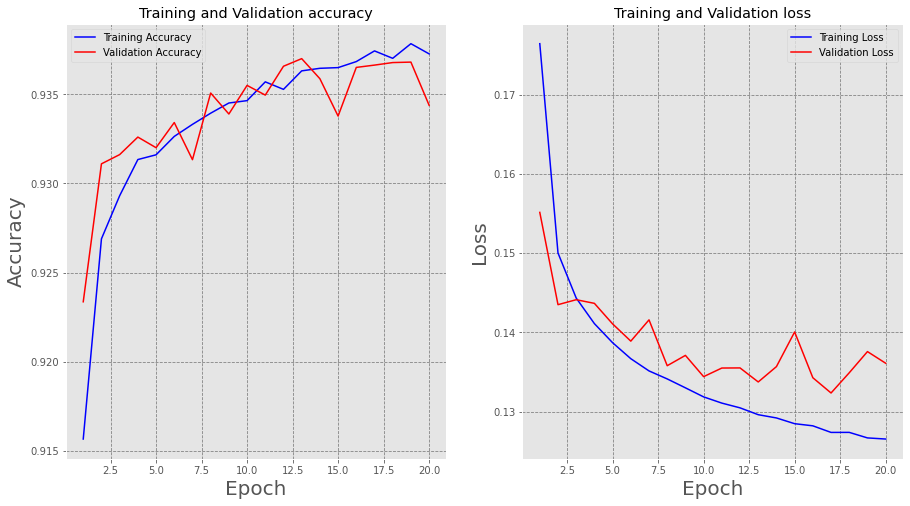

In [85]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  fig, ax = plt.subplots(1,2,figsize=(15,8))
    
  ax[0].plot(epochRange,history.history['accuracy'],'b',label = 'Training Accuracy')
  ax[0].plot(epochRange,history.history['val_accuracy'],'r',label = 'Validation Accuracy')
  ax[0].set_title('Training and Validation accuracy')
  ax[0].set_xlabel('Epoch', fontsize = 20)
  ax[0].set_ylabel('Accuracy', fontsize = 20)
  ax[0].legend()
  ax[0].grid(color='gray', linestyle='--')

  ax[1].plot(epochRange,history.history['loss'],'b',label = 'Training Loss')
  ax[1].plot(epochRange,history.history['val_loss'],'r',label = 'Validation Loss')
  ax[1].set_title('Training and Validation loss')
  ax[1].set_xlabel('Epoch', fontsize = 20)
  ax[1].set_ylabel('Loss', fontsize = 20)
  ax[1].legend()
  ax[1].grid(color='gray', linestyle='--')
    
  plt.show()
plotLearningCurve(r,n_epochs)

# Learning Curves (Accuracy vs Loss)

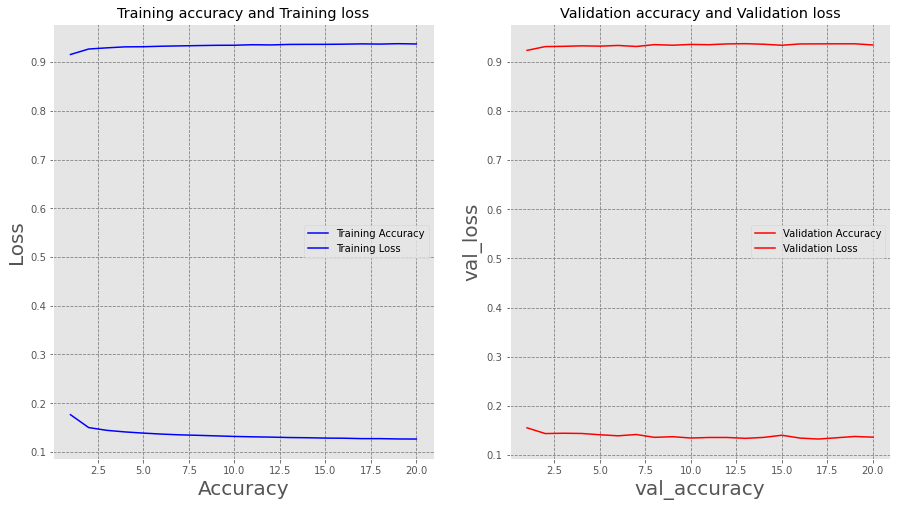

In [86]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  fig, ax = plt.subplots(1,2,figsize=(15,8))  
  ax[0].plot(epochRange,history.history['accuracy'],'b',label = 'Training Accuracy')
  ax[0].plot(epochRange,history.history['loss'],'b',label = 'Training Loss')
  ax[0].set_title('Training accuracy and Training loss')
  ax[0].set_xlabel('Accuracy', fontsize = 20)
  ax[0].set_ylabel('Loss', fontsize = 20)
  ax[0].legend()
  ax[0].grid(color='gray', linestyle='--')

  ax[1].plot(epochRange,history.history['val_accuracy'],'r',label = 'Validation Accuracy')
  ax[1].plot(epochRange,history.history['val_loss'],'r',label = 'Validation Loss')
  ax[1].set_title('Validation accuracy and Validation loss')
  ax[1].set_xlabel('val_accuracy', fontsize = 20)
  ax[1].set_ylabel('val_loss', fontsize = 20)
  ax[1].legend()
  ax[1].grid(color='gray', linestyle='--')
    
  plt.show()
plotLearningCurve(r,n_epochs)

In [51]:
LabelsToClasses = {'Normal': 0,'Attack': 1}
ClassesToLabels = {0:'Normal', 1:'Attack'}

# Predictions and Accuracy Score

In [117]:
y_pred = cnn_estimator.predict(X_test)
print(y_pred.shape)

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


(77302, 1)


In [100]:
y_pred = np.argmax(y_pred, axis=1)
print(y_pred.shape)

(77302,)


In [86]:
y_pred = y_pred.reshape(-1)
print(y_pred.shape)

(1,)


In [81]:
y_pred = np.squeeze(y_pred)
print(y_pred.shape)

(77302,)


In [68]:
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [69]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from tabulate import tabulate

# Predict on the test set
y_pred = model.predict(X_test_reshaped)
y_pred = y_pred.reshape(-1)

# Evaluate the classifier

train_score = model.score(X_train_reshaped, y_train)
accuracy = model.score(X_test_reshaped, y_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
support = np.sum(confusion_matrix(y_test, y_pred), axis=1)
    
table_data = [["Training score", train_score],
              ["Accuracy", accuracy],
              ["Precision", precision],
              ["Recall", recall],
              ["Support", support[1]]]

table_header = ["Metric", "Value"]
print(tabulate(table_data, headers=table_header))

AttributeError: 'Sequential' object has no attribute 'reshape'

# Classification Report

In [125]:
# Generate a classification report
report = classification_report(y_test, y_pred, target_names=ClassesToLabels.values())
print(report)

              precision    recall  f1-score   support

      Normal       0.90      0.92      0.91     27857
      Attack       0.96      0.95      0.95     49445

    accuracy                           0.94     77302
   macro avg       0.93      0.93      0.93     77302
weighted avg       0.94      0.94      0.94     77302



# Confusion Matrix

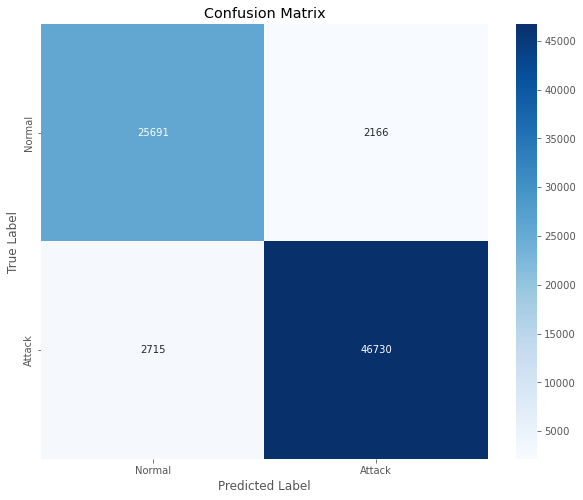

In [126]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", 
            xticklabels=list(LabelsToClasses.keys()),
            yticklabels=list(LabelsToClasses.keys()),)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ROC-AUC Curve

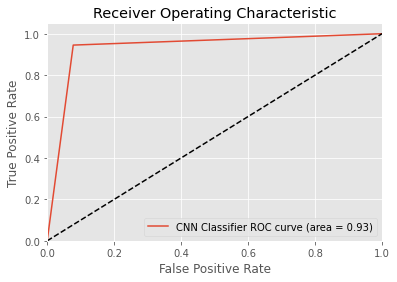

In [128]:
from sklearn.metrics import roc_auc_score, roc_curve

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred)

# Calculate the false positive rate, true positive rate, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot the ROC curve
plt.plot(fpr, tpr, label='CNN Classifier ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Explain Predictions (SHAP)

In [39]:
model = tf.keras.models.load_model("unsw_nb15_model_cnn.h5")

In [116]:
X_train_reshaped = X_train[:10].reshape(-1, 38)  # Assuming you want to reshape it to 2 dimensions


In [55]:
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [48]:
print(X_train_reshaped.shape[1:])

(38, 1)


In [56]:
print(X_train_reshaped.shape)

(180371, 38, 1)


In [57]:
X_train_reshaped_2 = X_train_reshaped[:10]
print(X_train_reshaped_2.shape)

(10, 38, 1)


In [66]:
import shap

# Explain predictions using SHAP Kernel Explainer
explainer = shap.KernelExplainer(model.predict_proba, X_train[:100])

# Compute SHAP values for 1000 test data
shap_values = explainer.shap_values(X_test[:100])

Provided model function fails when applied to the provided data set.


`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


ValueError: in user code:

    C:\Users\ILLUMINATI\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\keras\engine\training.py:1569 predict_function  *
        return step_function(self, iterator)
    C:\Users\ILLUMINATI\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\keras\engine\training.py:1559 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\ILLUMINATI\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\distribute\distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\ILLUMINATI\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\distribute\distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\ILLUMINATI\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\distribute\distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\ILLUMINATI\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\keras\engine\training.py:1552 run_step  **
        outputs = model.predict_step(data)
    C:\Users\ILLUMINATI\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\keras\engine\training.py:1525 predict_step
        return self(x, training=False)
    C:\Users\ILLUMINATI\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\keras\engine\base_layer.py:1013 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\ILLUMINATI\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\keras\engine\input_spec.py:215 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_1 is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, None)


In [ ]:
print(np.asarray(deep_shap_values).shape)

In [63]:
import shap

# Wrap the TensorFlow model with SHAP's TensorFlowExplainer
explainer = shap.DeepExplainer(model, X_train_reshaped[1:])

# Calculate SHAP values for the sample
deep_shap_values = explainer.shap_values(X_train_reshaped[1:])

You have provided over 5k background samples! For better performance consider using smaller random sample.


StagingError: in user code:

    c:\ProgramData\Anaconda3\lib\site-packages\shap\explainers\_deep\deep_tf.py:248 grad_graph  *
        x_grad = tape.gradient(out, shap_rAnD)
    C:\Users\ILLUMINATI\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\eager\backprop.py:1074 gradient  **
        flat_grad = imperative_grad.imperative_grad(
    C:\Users\ILLUMINATI\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\eager\imperative_grad.py:71 imperative_grad
        return pywrap_tfe.TFE_Py_TapeGradient(
    C:\Users\ILLUMINATI\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\eager\backprop.py:148 _gradient_function
        grad_fn = ops._gradient_registry.lookup(op_name)  # pylint: disable=protected-access
    C:\Users\ILLUMINATI\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\framework\registry.py:99 lookup
        raise LookupError(

    LookupError: gradient registry has no entry for: shap_TensorListStack


In [136]:
shap.plots.shap_values(explainer, X_train_reshaped[:10], deep_shap_values, show=True)

AttributeError: module 'shap.plots' has no attribute 'shap_values'

In [104]:
deep_shap_values = np.squeeze(deep_shap_values)

In [151]:
print(np.asarray(deep_shap_values)[:][0].shape)

(10, 38, 1)


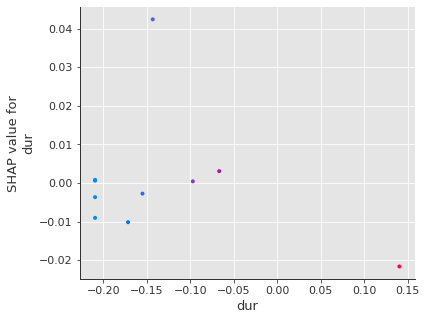

In [150]:
# Create the SHAP Dependence plot
shap.dependence_plot(0, deep_shap_values[:][0], X_test[:10], feature_names=feature_list)

In [170]:
deep_shap_values = np.asarray(deep_shap_values)
print(deep_shap_values.shape)
deep_shap_values = deep_shap_values.reshape(10, 38, 1)
print(deep_shap_values.shape)

(10, 38, 1, 1)
(10, 38, 1)


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

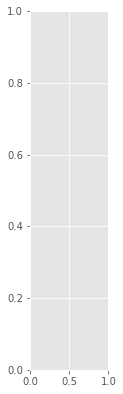

In [176]:
# Plot the SHAP values
shap.summary_plot(deep_shap_values, features=X_test[:10], feature_names=np.asarray(feature_list))

# Show the plot
plt.show()

# Explain Predictions (SHAP Tree Explainer)

In [44]:
print(X_test.shape)

(77302, 38, 1)


In [45]:
X_train = np.squeeze(X_train)
X_test = np.squeeze(X_test)

In [46]:
print(X_train.shape)
print(X_test.shape)

(180371, 38)
(77302, 38)


In [206]:
import shap

# Explain predictions using SHAP Tree
explainer = shap.KernelExplainer(cnn_estimator.model, X_train_reshaped[:10])

# Compute Tree SHAP values for test data
shap_values = explainer.shap_values(X_train_reshaped[:10])

AssertionError: Instance must have 1 or 2 dimensions!

In [196]:
print(np.asarray(shap_values).shape)

(1, 10, 38, 1)


## SHAP Summary Plot (Two Classes)

TypeError: only size-1 arrays can be converted to Python scalars

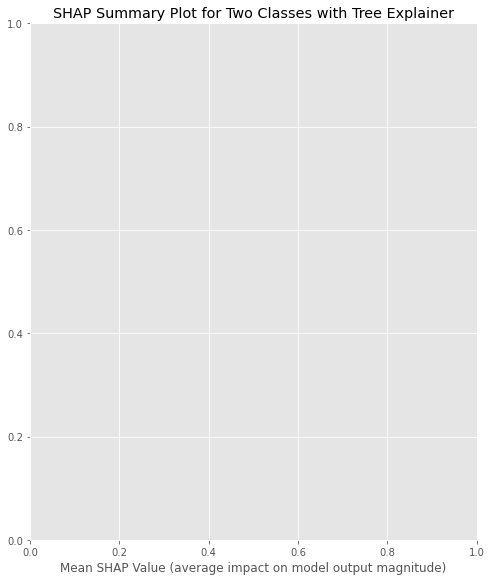

In [195]:
# Plot SHAP Tree Explainer for both classes 
plt.figure(figsize=(16, 8))
plt.title('SHAP Summary Plot for Two Classes with Tree Explainer')
plt.xlabel('Mean SHAP Value (average impact on model output magnitude)')
shap.summary_plot(shap_values, X_test[:10], plot_type="bar", feature_names=np.asarray(feature_list), class_names=ClassesToLabels)
plt.show()

## SHAP Summary Plot (Class 0)

In [ ]:
# shap_values = np.asarray(shap_values)
# shap_values = shap_values.reshape(shap_values.shape[1], shap_values.shape[2], shap_values.shape[0])
# print(shap_values.shape)

(100, 38, 2)


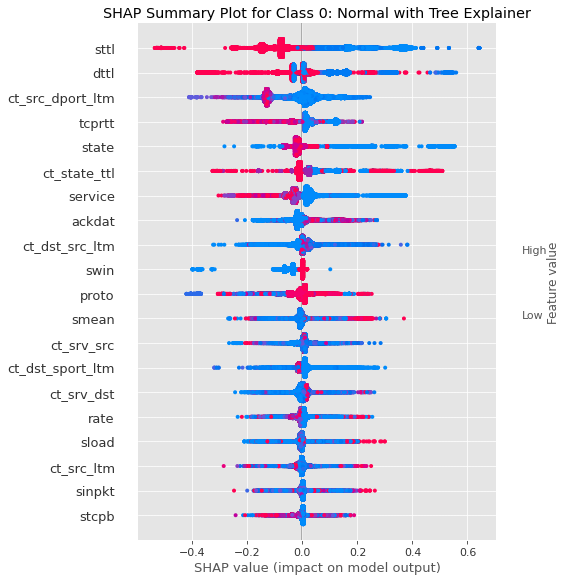

In [ ]:
# Plot SHAP Tree Explainer for Normal Class
plt.figure(figsize=(16, 8))
plt.title('SHAP Summary Plot for Class 0: Normal with Tree Explainer')
plt.xlabel('Mean SHAP Value (average impact on model output magnitude)')
shap.summary_plot(shap_values[0], X_test, feature_names = feature_list, class_names=ClassesToLabels)
plt.show()

## SHAP Summary Plot (Class 1)

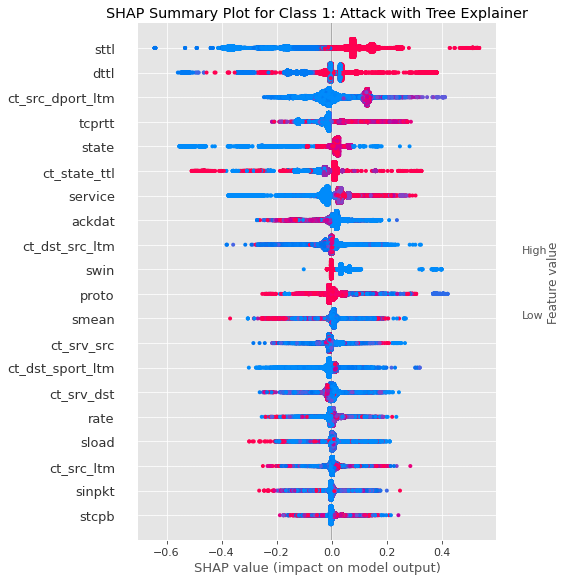

In [ ]:
# Plot SHAP Tree Explainer for Attack Class
plt.figure(figsize=(16, 8))
plt.title('SHAP Summary Plot for Class 1: Attack with Tree Explainer')
plt.xlabel('Mean SHAP Value (average impact on model output magnitude)')
shap.summary_plot(shap_values[1], X_test, feature_names = feature_list, class_names=ClassesToLabels)
plt.show()

## SHAP Dependence Plot (Class 0, Feature 0)

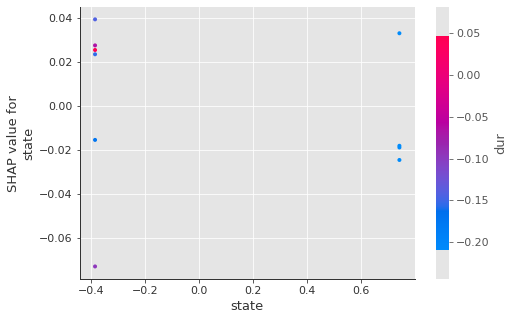

In [180]:
# Create the SHAP Dependence plot
shap.dependence_plot(3, deep_shap_values, X_test[:10], feature_names=feature_list)

## SHAP Dependence Plot (Class 1, Feature 0)

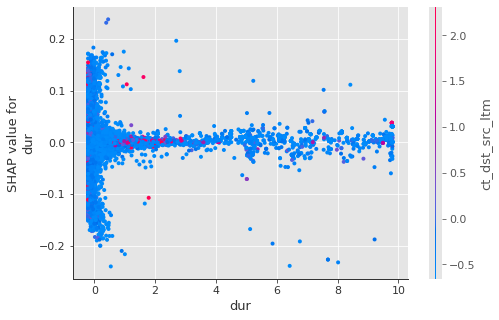

In [ ]:
# Create the SHAP Dependence plot
shap.dependence_plot(0, shap_values[1], X_test, feature_names=feature_list)

## SHAP Waterfall Plot (Class 0, Single Sample)

In [190]:
print(explainer.expected_value.eval)

<bound method _EagerTensorBase.eval of <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.79922295], dtype=float32)>>


In [192]:
# Create the SHAP waterfall plot
exp = shap.Explanation(deep_shap_values, explainer.expected_value, data=X_test[:10], feature_names=feature_list)
idx = 1

# Set the title and axis labels
plt.figure(figsize=(16, 8))
plt.title('SHAP Waterfall Plot for X_test[{}]'.format(idx))
plt.xlabel('SHAP Value')
shap.plots.waterfall(exp[idx], max_display=40)
plt.show()

TypeError: Scalar tensor has no `len()`

## SHAP Force Plot (Class 0, 1000 Samples)

In [ ]:
# Compute Tree SHAP values for 1000 test data
shap_values_minimal = explainer.shap_values(X_test[:1000])
shap.initjs()

In [ ]:
# Create the SHAP Force plot
shap.force_plot(explainer.expected_value[0], shap_values_minimal[0], feature_names = feature_list)

## SHAP Force Plot (Class 1, 1000 Samples)

In [ ]:
# Create the SHAP Force plot
shap.force_plot(explainer.expected_value[1], shap_values_minimal[1], feature_names = feature_list, )

## SHAP Force Plot (Class 0, Single Sample)

In [ ]:
# Compute Tree SHAP values for 1000 test data
shap_values_single = explainer.shap_values(X_test[0])

In [ ]:
shap.force_plot(explainer.expected_value[0], shap_values_single[0], feature_names = feature_list)

## SHAP Force Plot (Class 1, Single Sample)

In [ ]:
shap.force_plot(explainer.expected_value[1], shap_values_single[1], feature_names = feature_list)

## SHAP Explainer (Two classes for 1000 test data)

<Figure size 720x864 with 0 Axes>

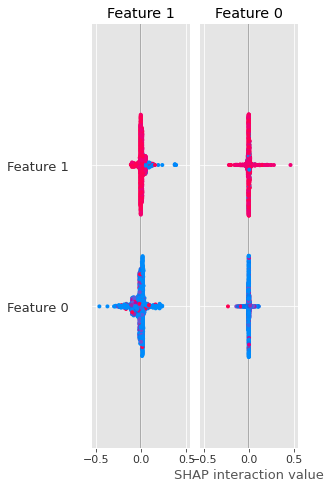

In [ ]:
import shap

# Explain predictions using SHAP
explainer_2 = shap.Explainer(et_classifier.estimators_[99])

# Compute SHAP values for 1000 test data
shap_values_2 = explainer_2(X_test[:1000])

# Plot SHAP Explainer
plt.figure(figsize=(10, 12))
shap.summary_plot(shap_values_2, X_test[:1000])
plt.show()

# Explain Predictions (Lime)

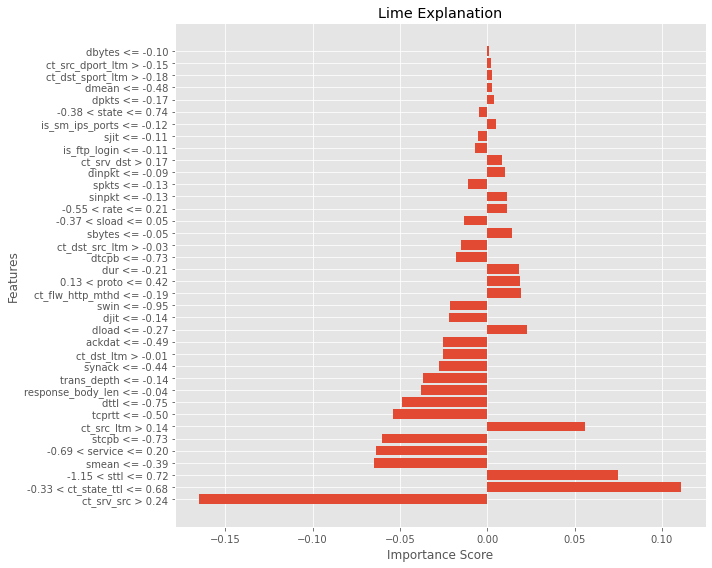

In [ ]:
import lime
from lime import lime_tabular
from IPython.display import display, HTML

predict_fn_rf = lambda x: et_classifier.estimators_[99].predict_proba(x).astype(float)
explainer = lime.lime_tabular.LimeTabularExplainer(X_train,
                                                   feature_names = feature_list,
                                                   class_names=['Normal','Attack'],
                                                   kernel_width=5)

choosen_instance = X_test[10]
exp = explainer.explain_instance(choosen_instance, 
                                 predict_fn_rf,
                                 num_features=X_train.shape[1])


# Get the feature importance values and names
importance_values = exp.as_list()
features, importance_scores = zip(*importance_values)

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.barh(range(len(features)), importance_scores, align='center')
plt.yticks(range(len(features)), features)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Lime Explanation')
plt.tight_layout()
plt.show()

exp.show_in_notebook(show_all=False)


# # Print the explanations
# print("Lime Explainer (Kernels):")
# print(exp.as_list())

# ELI5

Explanation(estimator="PermutationImportance(estimator=ExtraTreeClassifier(random_state=1396067212),\n                      random_state=42, scoring='accuracy')", description="\nFeature importances, computed as a decrease in score when feature\nvalues are permuted (i.e. become noise). This is also known as \npermutation importance.\n\nIf feature importances are computed on the same data as used for training, \nthey don't reflect importance of features for generalization. Use a held-out\ndataset if you want generalization feature importances.\n", error=None, method='feature importances', is_regression=False, targets=None, feature_importances=FeatureImportances(importances=[FeatureWeight(feature='smean', weight=0.16745491707847143, std=0.000489846055828552, value=None), FeatureWeight(feature='ct_srv_src', weight=0.16690900623528496, std=0.0013772511229417895, value=None), FeatureWeight(feature='dload', weight=0.05417453623450876, std=0.0006120048087171522, value=None), FeatureWeight(feat

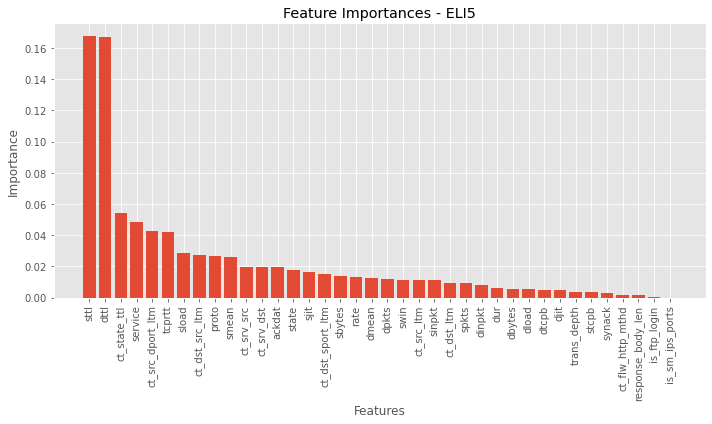

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance
import numpy as np
import matplotlib.pyplot as plt

# Create the ELI5 explainer
explainer = PermutationImportance(et_classifier.estimators_[99], scoring='accuracy', random_state=42)

# Fit the explainer on the test data
explainer.fit(X_test, y_test)

# Get feature importances from the explainer
importances = explainer.feature_importances_
feature_names = np.array(feature_list)  # Replace with actual feature names

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
sorted_feature_names = feature_names[indices]
sorted_importances = importances[indices]

# Generate explanations
explanations = eli5.explain_weights(explainer, feature_names=sorted_feature_names)

# Print explanations
print(explanations)

# Plot the feature importances
plt.figure(figsize=(10, 6))  # Adjust the figsize parameter as desired
plt.bar(range(len(sorted_importances)), sorted_importances)
plt.xticks(range(len(sorted_importances)), sorted_feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances - ELI5')
plt.tight_layout()
plt.show()